In [1]:
from google.colab import files
uploaded = files.upload()


Saving imdb_top_1000.csv to imdb_top_1000.csv


In [2]:
import pandas as pd

# Replace 'imdb_top_1000.csv' with the name of your uploaded file
df = pd.read_csv("imdb_top_1000.csv")

# Preview the first few rows of the dataset
df.head()


,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
# Check the shape of the dataset
print(df.shape)

# Get an overview of the columns
df.info()

# Check for missing values
print(df.isnull().sum())


(1000, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
Poster_Link        0
Serie

In [4]:
# Convert Released_Year to numeric
df['Released_Year'] = pd.to_numeric(df['Released_Year'], errors='coerce')

# Handle missing values in Certificate
df['Certificate'].fillna('Unknown', inplace=True)

# Handle missing values in Meta_score
df['Meta_score'].fillna(df['Meta_score'].median(), inplace=True)

# Clean Gross column and convert to numeric
df['Gross'] = df['Gross'].str.replace(',', '')  # Remove commas
df['Gross'] = pd.to_numeric(df['Gross'], errors='coerce')

# Handle missing values in Gross
df['Gross'].fillna(df['Gross'].median(), inplace=True)


<ipython-input-4-e3a4bd9b81f9>:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Certificate'].fillna('Unknown', inplace=True)
<ipython-input-4-e3a4bd9b81f9>:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using

In [5]:
# Extract numerical part of Runtime
df['Runtime'] = df['Runtime'].str.extract('(\d+)').astype(int)


In [6]:
print(df.info())
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  999 non-null    float64
 3   Certificate    1000 non-null   object 
 4   Runtime        1000 non-null   int64  
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     1000 non-null   float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          1000 non-null   float64
dtypes: float64(4), int64(2), object(10)
memory usage: 125.1+ KB
None
Poster_Link      0
Series_Title 

In [7]:
df = df.dropna(subset=['Released_Year'])


In [8]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    999 non-null    object 
 1   Series_Title   999 non-null    object 
 2   Released_Year  999 non-null    float64
 3   Certificate    999 non-null    object 
 4   Runtime        999 non-null    int64  
 5   Genre          999 non-null    object 
 6   IMDB_Rating    999 non-null    float64
 7   Overview       999 non-null    object 
 8   Meta_score     999 non-null    float64
 9   Director       999 non-null    object 
 10  Star1          999 non-null    object 
 11  Star2          999 non-null    object 
 12  Star3          999 non-null    object 
 13  Star4          999 non-null    object 
 14  No_of_Votes    999 non-null    int64  
 15  Gross          999 non-null    float64
dtypes: float64(4), int64(2), object(10)
memory usage: 132.7+ KB
None
Poster_Link      0
Series_Title     0


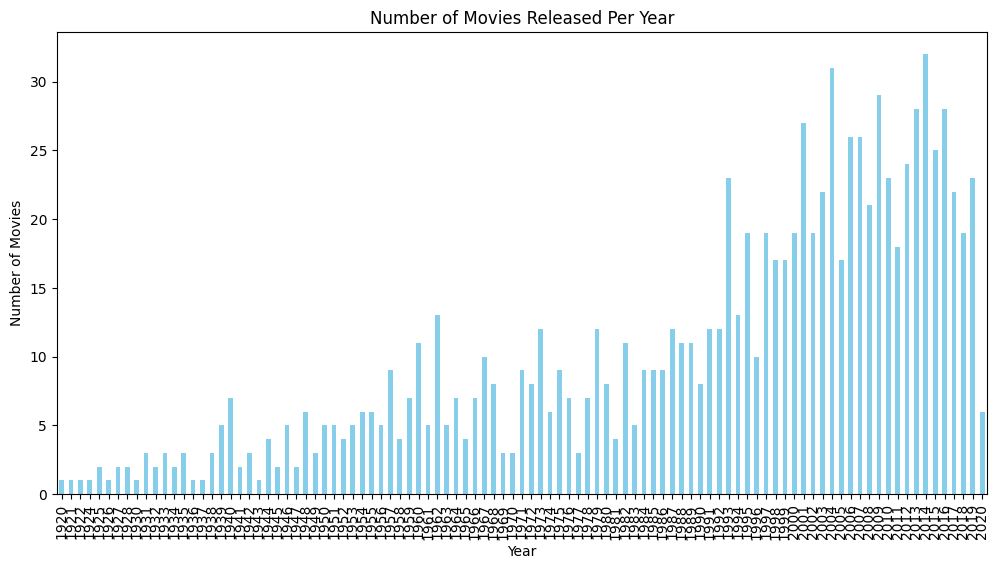

In [9]:
#  Trends in the numbers of movies released on a yearly basis
import matplotlib.pyplot as plt

# Convert Released_Year to int for better plotting
df['Released_Year'] = df['Released_Year'].astype(int)

movies_per_year = df['Released_Year'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
movies_per_year.plot(kind='bar', color='skyblue')
plt.title('Number of Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()


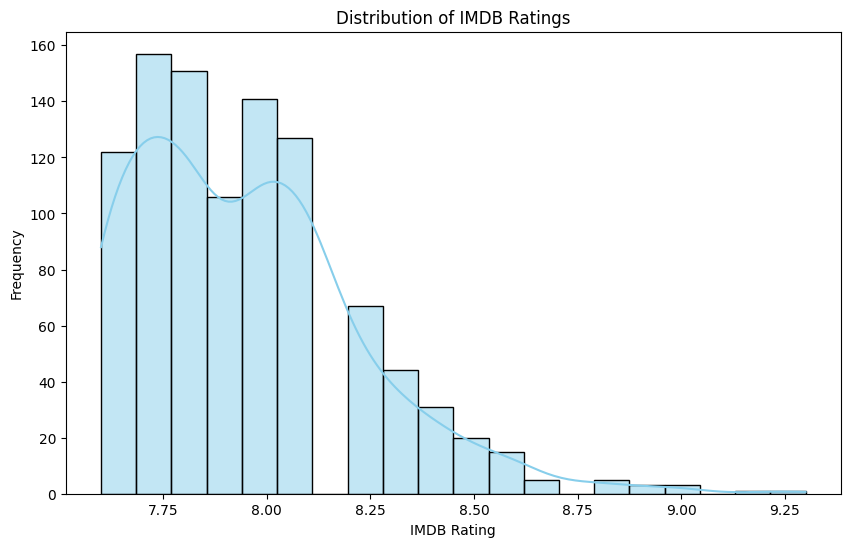

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
# Distribution of the IMDB ratings
plt.figure(figsize=(10, 6))
sns.histplot(df['IMDB_Rating'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of IMDB Ratings')
plt.xlabel('IMDB Rating')
plt.ylabel('Frequency')
plt.show()



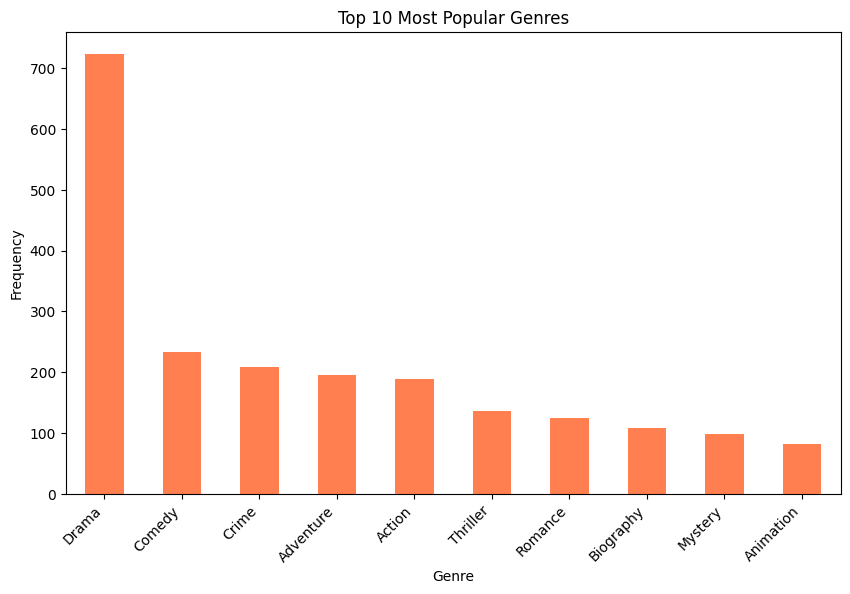

In [14]:
# Visualization of the top 10 most popular genres
# Split the Genre column into a list of genres, and then explode
genre_counts = df['Genre'].str.split(',').explode().str.strip().value_counts().head(10)

# Plot the Top 10 Most Popular Genres
plt.figure(figsize=(10, 6))
genre_counts.plot(kind='bar', color='coral')
plt.title('Top 10 Most Popular Genres')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()


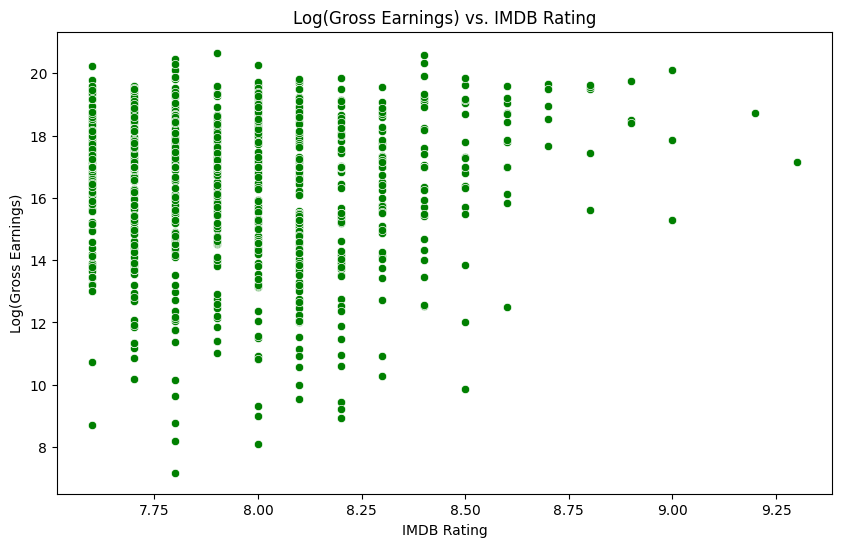

In [16]:
# Testing for correlation between Gross Earnings and IMDB rating
# Apply log transformation to Gross column to reduce the scale
import numpy as np

# Avoid issues with zeros or negative values
df['Log_Gross'] = np.log1p(df['Gross'])

# Scatter plot with log-transformed Gross
plt.figure(figsize=(10, 6))
sns.scatterplot(x='IMDB_Rating', y='Log_Gross', data=df, color='green')
plt.title('Log(Gross Earnings) vs. IMDB Rating')
plt.xlabel('IMDB Rating')
plt.ylabel('Log(Gross Earnings)')
plt.show()


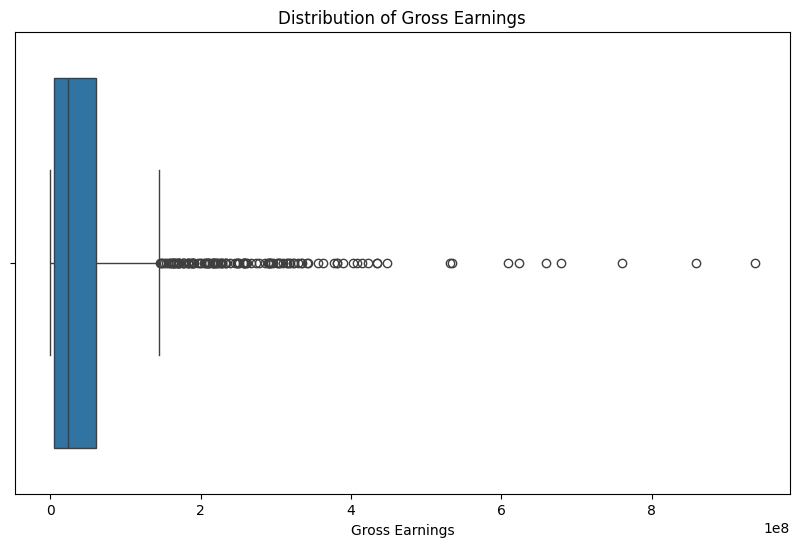

In [17]:
# Checking for outliers in the gross earnings
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Gross'])
plt.title('Distribution of Gross Earnings')
plt.xlabel('Gross Earnings')
plt.show()


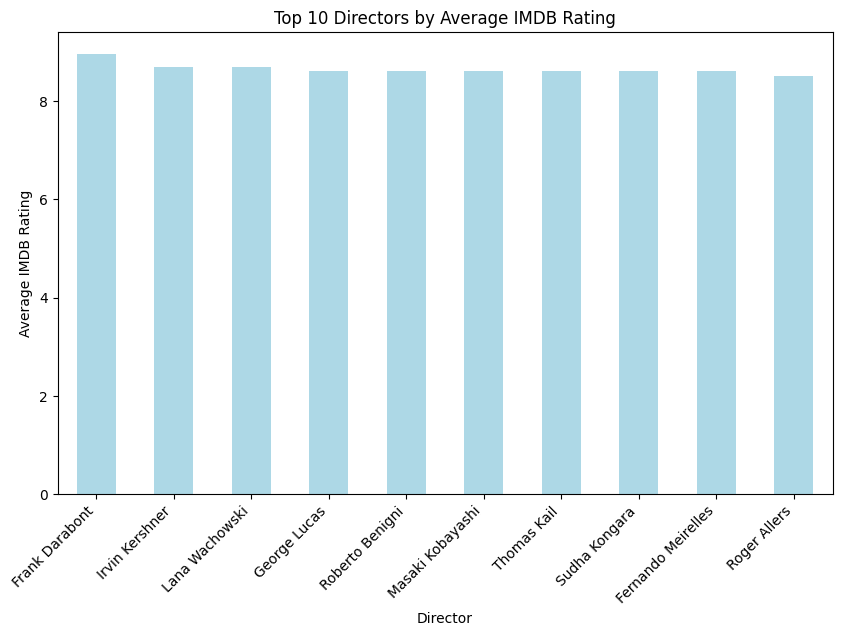

In [18]:
# Visualization of the top 10 directors by average IMDB rating
avg_rating_by_director = df.groupby('Director')['IMDB_Rating'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
avg_rating_by_director.plot(kind='bar', color='lightblue')
plt.title('Top 10 Directors by Average IMDB Rating')
plt.xlabel('Director')
plt.ylabel('Average IMDB Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


<ipython-input-19-bf4281ba0f15>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Certificate', y='IMDB_Rating', data=df, palette='Set2')


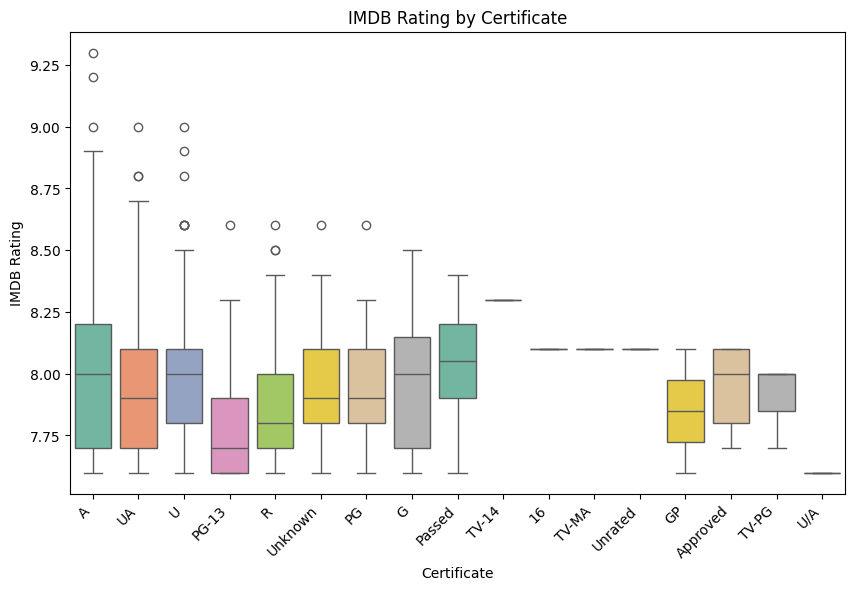

In [19]:
# Checking for the IMDB rating by certificate tendency
plt.figure(figsize=(10, 6))
sns.boxplot(x='Certificate', y='IMDB_Rating', data=df, palette='Set2')
plt.title('IMDB Rating by Certificate')
plt.xlabel('Certificate')
plt.ylabel('IMDB Rating')
plt.xticks(rotation=45, ha='right')
plt.show()


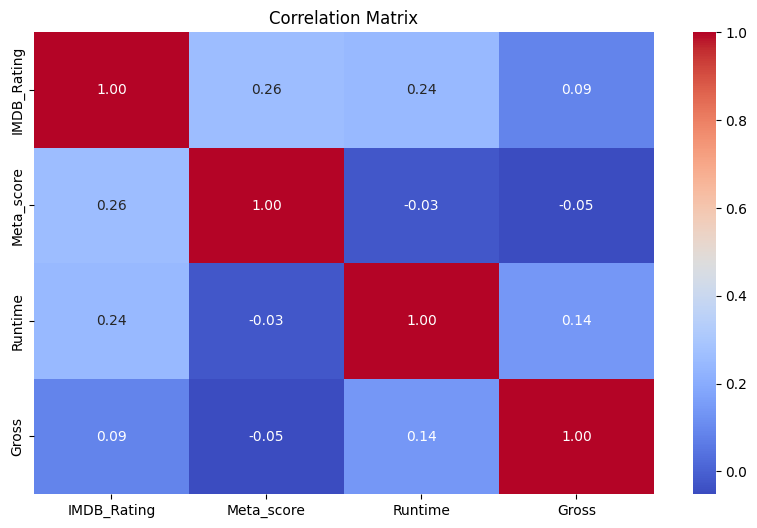

In [20]:
# Correlation matrix
plt.figure(figsize=(10, 6))
corr = df[['IMDB_Rating', 'Meta_score', 'Runtime', 'Gross']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


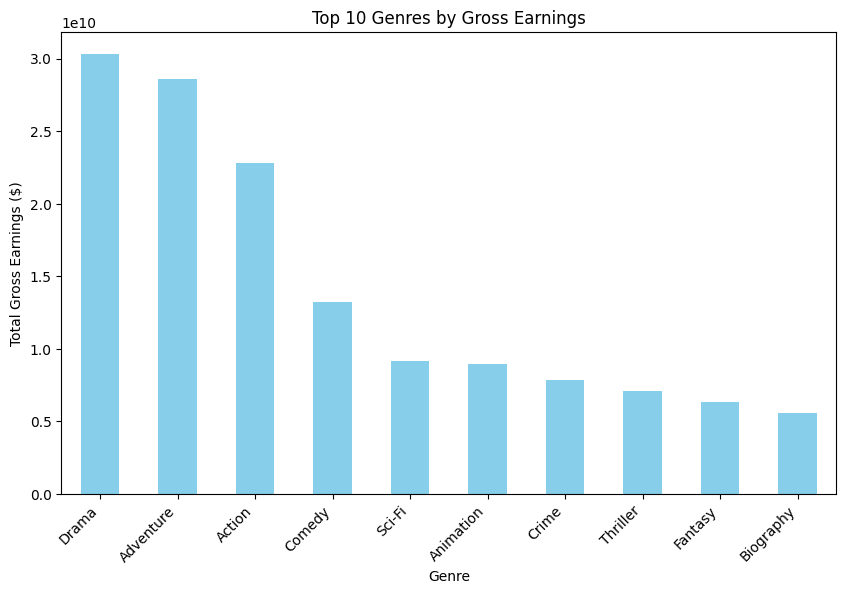

In [22]:
# Visualization of the top 10 genres by gross earnings
# Split genres, explode, and strip spaces
genre_gross = df['Genre'].str.split(',').explode().str.strip()

# Add 'Gross' to the exploded dataframe
gross_values = df['Gross'].repeat(df['Genre'].str.split(',').str.len())

# Create a new DataFrame with exploded genres and corresponding gross values
genre_gross_df = pd.DataFrame({
    'Genre': genre_gross,
    'Gross': gross_values
})

# Now group by genre and sum the Gross earnings
genre_gross = genre_gross_df.groupby('Genre')['Gross'].sum().sort_values(ascending=False).head(10)

# Plot top 10 genres by Gross earnings
plt.figure(figsize=(10, 6))
genre_gross.plot(kind='bar', color='skyblue')
plt.title('Top 10 Genres by Gross Earnings')
plt.xlabel('Genre')
plt.ylabel('Total Gross Earnings ($)')
plt.xticks(rotation=45, ha='right')
plt.show()


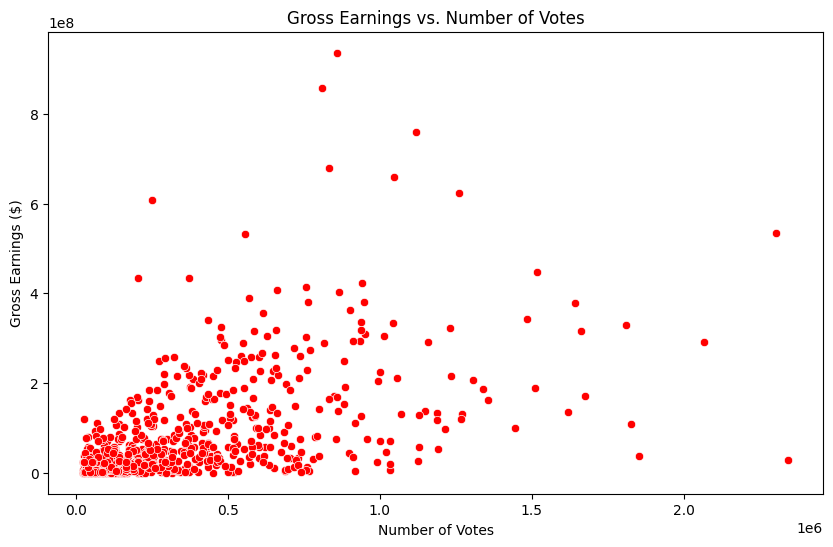

In [23]:
# Corelation between gross earnings and number of votes
plt.figure(figsize=(10, 6))
sns.scatterplot(x='No_of_Votes', y='Gross', data=df, color='red')
plt.title('Gross Earnings vs. Number of Votes')
plt.xlabel('Number of Votes')
plt.ylabel('Gross Earnings ($)')
plt.show()
